In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix

C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

In [3]:
df = pd.read_csv('../../data/data/H161.csv', parse_dates=['utc_time'])
df.columns = ['time','batch','phase', 'heat_time', 'weight', 'head_temp', 'head_pressure', 'vac_temp']

C:\Users\lbushman\AppData\Local\Temp\ipykernel_21376\1626634897.py:1: DtypeWarning: Columns (1,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/data/H161.csv', parse_dates=['utc_time'])


In [4]:
df = df[df['phase'].str.contains ('DRYING|DISCHRG') == True]
# df = df[df['phase'].str.contains ('DRYING') == True]


In [5]:
df["time"] = df["time"].dt.tz_localize(None)
df['date'] = df['time'].dt.date
df['day'] = df['time'].dt.dayofweek


In [6]:
df.replace({'??????': None}, inplace=True)
df.replace({'????????': None}, inplace=True)
df.dropna(inplace=True)

In [7]:
df['head_temp'] = df.head_temp.astype(float)
df['weight'] = df.weight.astype(float)
df['head_pressure'] = df.head_pressure.astype(float)
df['heat_time'] = df.heat_time.astype(float)
df['vac_temp'] = df.vac_temp.astype(float)
df['batch'] = df.batch.astype(float)
df['phase'] = df.phase.astype('category')

In [8]:
n = 30  # number of points to be checked before and after

# Find local peaks
df['max_temp'] = 0
df['max_temp'] = df.iloc[argrelextrema(df.head_temp.values, np.greater_equal, order=n)]['head_temp']

In [9]:
df['ready'] = 0
delta_t = 2

for i in range (1, len(df['ready']-1)):
    if df.max_temp.values[i] > 0:
        local_max = df.max_temp.values[i]
        current = df.batch.values[i]
        while df['batch'].values[i] == current:
            if local_max - df.head_temp.values[i] > delta_t:
                i += 1
                df.ready.values[i] = 1
            else:
                i += 1
                df.ready.values[i] = 2
            
                
df = df.drop(['max_temp'], axis=1)
df = df[df['phase'].str.contains ('DRYING') == True]

In [10]:
df['head_pressure_20'] = df['head_pressure'].shift(-20)
df['head_temp_20'] = df['head_temp'].shift(-20)
df['weight_20'] = df['weight'].shift(-20)
df['heat_time_20'] = df['heat_time'].shift(-20)
df['vac_temp_20'] = df['vac_temp'].shift(-20)

df['head_pressure_30'] = df['head_pressure'].shift(-30)
df['head_temp_30'] = df['head_temp'].shift(-30)
df['weight_30'] = df['weight'].shift(-30)
df['heat_time_30'] = df['heat_time'].shift(-30)
df['vac_temp_30'] = df['vac_temp'].shift(-30)

df['head_pressure_35'] = df['head_pressure'].shift(-35)
df['head_temp_35'] = df['head_temp'].shift(-35)
df['weight_35'] = df['weight'].shift(-35)
df['heat_time_35'] = df['heat_time'].shift(-35)
df['vac_temp_35'] = df['vac_temp'].shift(-35)

df['head_pressure_40'] = df['head_pressure'].shift(-40)
df['head_temp_40'] = df['head_temp'].shift(-40)
df['weight_40'] = df['weight'].shift(-40)
df['heat_time_40'] = df['heat_time'].shift(-40)
df['vac_temp_40'] = df['vac_temp'].shift(-40)
df.dropna(inplace=True)
df.head()


,time,batch,phase,heat_time,weight,head_temp,head_pressure,vac_temp,date,day,...,head_pressure_35,head_temp_35,weight_35,heat_time_35,vac_temp_35,head_pressure_40,head_temp_40,weight_40,heat_time_40,vac_temp_40
28,2020-04-17 11:49:11,22096.0,DRYING,25.4,3956.1,57.5,186.7,31.27,2020-04-17,4,...,243.7,57.7,3893.3,60.4,32.96,264.7,57.8,3884.9,65.4,32.98
29,2020-04-17 11:50:11,22096.0,DRYING,26.4,3954.5,57.5,186.2,31.34,2020-04-17,4,...,247.9,57.7,3891.6,61.4,32.97,268.9,57.8,3883.3,66.4,32.98
30,2020-04-17 11:51:11,22096.0,DRYING,27.4,3952.9,57.5,185.7,31.42,2020-04-17,4,...,252.1,57.8,3889.9,62.4,32.97,273.0,57.9,3881.6,67.4,32.99
31,2020-04-17 11:52:11,22096.0,DRYING,28.4,3951.4,57.5,185.2,31.50,2020-04-17,4,...,256.3,57.8,3888.3,63.4,32.97,277.2,57.9,3880.0,68.4,32.99
32,2020-04-17 11:53:11,22096.0,DRYING,29.4,3949.8,57.5,184.7,31.58,2020-04-17,4,...,260.5,57.8,3886.6,64.4,32.98,281.4,57.9,3878.3,69.4,32.99


In [11]:
# def load_query(path):
#     with open(path) as file:
#         return file.read()

In [12]:
# query = load_query('queries/daily_cycles.sql')
# daily_cycles = pysqldf(query)

In [13]:
# daily_cycles.sample(4)

In [14]:
# daily_cycles.describe()

In [15]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [16]:
# plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
# fig, ax = plt.subplots()
# sns.lineplot(data=daily_cycles.tail(50), x='DATE', y='num_cycles')
# plt.grid(linestyle='-', linewidth=0.3)
# ax.tick_params(axis='x', rotation=90)

In [17]:
# query = load_query('queries/weekly_cycles.sql')
# weekly_cycles = pysqldf(query)

In [18]:
# weekly_cycles.tail()

In [19]:
# plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
# fig, ax = plt.subplots()
# sns.lineplot(data=weekly_cycles.tail(50), x='week', y='num_cycles')
# plt.grid(linestyle='-', linewidth=0.3)
# ax.tick_params(axis='x', rotation=90)

In [20]:
df = df[df['ready'] < 2]

In [21]:
features = [
            # 'heat_time', 'weight', 'head_temp', 'head_pressure', 'vac_temp',
            # 'heat_time_20', 'weight_20', 'head_temp_20', 'head_pressure_20', 'vac_temp_20',
            'heat_time_30', 'weight_30', 'head_temp_30', 'head_pressure_30', 'vac_temp_30',
            'heat_time_35', 'weight_35', 'head_temp_35', 'head_pressure_35', 'vac_temp_35',
            'heat_time_40', 'weight_40', 'head_temp_40', 'head_pressure_40', 'vac_temp_40'
            ]
label = ['ready']
train_df = df.head(int(df.shape[0]*.75))
test_df = df.tail(int(df.shape[0]*0.25))


X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]


In [22]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            # gamma=0.25,
                            max_depth=8,
                            seed=42)

In [23]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_train, y_train),(X_test, y_test)])

C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0]	validation_0-aucpr:0.98651	validation_1-aucpr:0.96082
[1]	validation_0-aucpr:0.98909	validation_1-aucpr:0.96864
[2]	validation_0-aucpr:0.99105	validation_1-aucpr:0.97331
[3]	validation_0-aucpr:0.99182	validation_1-aucpr:0.97390
[4]	validation_0-aucpr:0.99253	validation_1-aucpr:0.97359
[5]	validation_0-aucpr:0.99300	validation_1-aucpr:0.97469
[6]	validation_0-aucpr:0.99379	validation_1-aucpr:0.97446
[7]	validation_0-aucpr:0.99411	validation_1-aucpr:0.97462
[8]	validation_0-aucpr:0.99447	validation_1-aucpr:0.97480
[9]	validation_0-aucpr:0.99481	validation_1-aucpr:0.97481
[10]	validation_0-aucpr:0.99514	validation_1-aucpr:0.97571
[11]	validation_0-aucpr:0.99539	validation_1-aucpr:0.97657
[12]	validation_0-aucpr:0.99560	validation_1-aucpr:0.97632
[13]	validation_0-aucpr:0.99576	validation_1-aucpr:0.97631
[14]	validation_0-aucpr:0.99585	validation_1-aucpr:0.97638
[15]	validation_0-aucpr:0.99606	validation_1-aucpr:0.97631
[16]	validation_0-aucpr:0.99628	validation_1-aucpr:0.97640
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

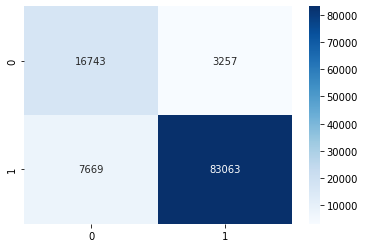

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = clf_xgb.predict_proba(X_test)[:,1]
thr=0.7
sns.heatmap(confusion_matrix(y_test,pred>thr),annot=True,fmt='', cmap='Blues')

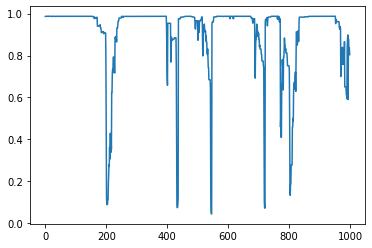

In [25]:
plt.plot(pd.Series(pred[-1000:]))

C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


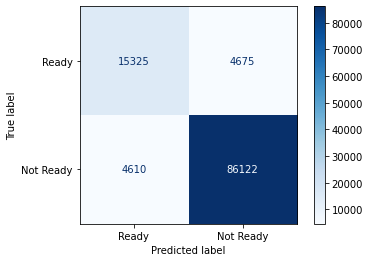

In [26]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      cmap='Blues',
                      display_labels=['Ready', 'Not Ready'])

In [27]:
bst = clf_xgb.get_booster()
for importance_type in ('weight','gain', 'cover', 'total_gain','total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

weight:  {'heat_time_30': 381.0, 'weight_30': 330.0, 'head_temp_30': 327.0, 'head_pressure_30': 199.0, 'vac_temp_30': 351.0, 'heat_time_35': 140.0, 'weight_35': 136.0, 'head_temp_35': 99.0, 'head_pressure_35': 146.0, 'vac_temp_35': 189.0, 'heat_time_40': 232.0, 'weight_40': 220.0, 'head_temp_40': 260.0, 'head_pressure_40': 169.0, 'vac_temp_40': 328.0}
gain:  {'heat_time_30': 248.064697265625, 'weight_30': 61.66028594970703, 'head_temp_30': 277.6470031738281, 'head_pressure_30': 66.07776641845703, 'vac_temp_30': 84.06578063964844, 'heat_time_35': 60.39262008666992, 'weight_35': 33.9726448059082, 'head_temp_35': 34.569061279296875, 'head_pressure_35': 37.00481414794922, 'vac_temp_35': 31.668394088745117, 'heat_time_40': 147.27403259277344, 'weight_40': 39.580291748046875, 'head_temp_40': 66.11151123046875, 'head_pressure_40': 117.01297760009766, 'vac_temp_40': 54.13851547241211}
cover:  {'heat_time_30': 3453.762451171875, 'weight_30': 1404.7176513671875, 'head_temp_30': 3376.722412109375

In [28]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=clf_xgb.predict_proba(X_test)[:,1]>0.5, normalize=True)

C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9161489000469603

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=clf_xgb.predict_proba(X_test)[:,1]>0.5, target_names=['ready', 'not yet']))

C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

       ready       0.77      0.77      0.77     20000
     not yet       0.95      0.95      0.95     90732

    accuracy                           0.92    110732
   macro avg       0.86      0.86      0.86    110732
weighted avg       0.92      0.92      0.92    110732



In [30]:
node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH